In [2]:
import pandas as pd
import numpy as np
import sys
import os
import scipy.stats as stats
import time
import tqdm
import seaborn as sns
from sklearn import svm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize

### Load CSV

In [3]:
train_txt_path = '../dataset/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.train.trn.txt'

df_train = pd.read_csv(train_txt_path, sep=" ", header=None)
df_train.columns = ["speaker_id", "audio_filename", "null", "system_id", "label"]
df_train = df_train.drop(columns="null")

dev_txt_path = '../dataset/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.dev.trl.txt'

df_dev = pd.read_csv(dev_txt_path, sep=" ", header=None)
df_dev.columns = ["speaker_id", "audio_filename", "null", "system_id", "label"]
df_dev = df_dev.drop(columns="null")

eval_txt_path = '../dataset/LA/ASVspoof2019_LA_cm_protocols/ASVspoof2019.LA.cm.eval.trl.txt'

df_eval = pd.read_csv(eval_txt_path, sep=" ", header=None)
df_eval.columns = ["speaker_id", "audio_filename", "null", "system_id", "label"]
df_eval = df_eval.drop(columns="null")

### Params

In [4]:
nfft = 128
hop_size = 64 

### Train features

train_feat_root_path = '../features/bicoherences/train_nfft_{}_hop_size_{}'.format(nfft, hop_size)

df_train["mean_mag"] = np.nan
df_train["var_mag"] = np.nan
df_train["skew_mag"] = np.nan
df_train["kurt_mag"] = np.nan

df_train["mean_phase"] = np.nan
df_train["var_phase"] = np.nan
df_train["skew_phase"] = np.nan
df_train["kurt_phase"] = np.nan


for index, row in tqdm.tqdm(df_train.iterrows(), total=df_train.shape[0]):
    feat_path = os.path.join(train_feat_root_path, row['audio_filename'] + '.npy')
    bicoh = np.load(feat_path)
    mag = np.abs(bicoh)
    phase = np.angle(bicoh)
    df_train.at[index, 'mean_mag'] = np.mean(mag)
    df_train.at[index, 'var_mag'] = np.var(mag)
    df_train.at[index, 'skew_mag'] = stats.skew(mag, axis=None)
    df_train.at[index, 'kurt_mag'] = stats.kurtosis(mag, axis=None)
    
    df_train.at[index, 'mean_phase'] = np.mean(phase)
    df_train.at[index, 'var_phase'] = np.var(phase)
    df_train.at[index, 'skew_phase'] = stats.skew(phase, axis=None)
    df_train.at[index, 'kurt_phase'] = stats.kurtosis(phase, axis=None)

df_train.to_pickle('../features/bicoherences/dataframes/train_bicoh_stats_nfft_{}_hop_size_{}'.format(nfft, hop_size))

In [6]:
df_train = pd.read_pickle('../features/bicoherences/dataframes/train_bicoh_stats_nfft_{}_hop_size_{}'.format(
    nfft, hop_size))

### Load dev features

dev_feat_root_path = '../features/bicoherences/dev_nfft_{}_hop_size_{}'.format(nfft, hop_size)

df_dev["mean_mag"] = np.nan
df_dev["var_mag"] = np.nan
df_dev["skew_mag"] = np.nan
df_dev["kurt_mag"] = np.nan

df_dev["mean_phase"] = np.nan
df_dev["var_phase"] = np.nan
df_dev["skew_phase"] = np.nan
df_dev["kurt_phase"] = np.nan


for index, row in tqdm.tqdm(df_dev.iterrows(), total=df_dev.shape[0]):
    feat_path = os.path.join(dev_feat_root_path, row['audio_filename'] + '.npy')
    bicoh = np.load(feat_path)
    mag = np.abs(bicoh)
    phase = np.angle(bicoh)
    df_dev.at[index, 'mean_mag'] = np.mean(mag)
    df_dev.at[index, 'var_mag'] = np.var(mag)
    df_dev.at[index, 'skew_mag'] = stats.skew(mag, axis=None)
    df_dev.at[index, 'kurt_mag'] = stats.kurtosis(mag, axis=None)
    
    df_dev.at[index, 'mean_phase'] = np.mean(phase)
    df_dev.at[index, 'var_phase'] = np.var(phase)
    df_dev.at[index, 'skew_phase'] = stats.skew(phase, axis=None)
    df_dev.at[index, 'kurt_phase'] = stats.kurtosis(phase, axis=None)


df_dev.to_pickle('../features/bicoherences/dataframes/dev_bicoh_stats_nfft_{}_hop_size_{}'.format(nfft, hop_size))

In [7]:
df_dev = pd.read_pickle('../features/bicoherences/dataframes/dev_bicoh_stats_nfft_{}_hop_size_{}'.format(
    nfft, hop_size))

### Load eval features

eval_feat_root_path = '../features/bicoherences/eval_nfft_{}_hop_size_{}'.format(nfft, hop_size)

df_eval["mean_mag"] = np.nan
df_eval["var_mag"] = np.nan
df_eval["skew_mag"] = np.nan
df_eval["kurt_mag"] = np.nan

df_eval["mean_phase"] = np.nan
df_eval["var_phase"] = np.nan
df_eval["skew_phase"] = np.nan
df_eval["kurt_phase"] = np.nan


for index, row in tqdm.tqdm(df_eval.iterrows(), total=df_eval.shape[0]):
    feat_path = os.path.join(eval_feat_root_path, row['audio_filename'] + '.npy')
    bicoh = np.load(feat_path)
    mag = np.abs(bicoh)
    phase = np.angle(bicoh)
    df_eval.at[index, 'mean_mag'] = np.mean(mag)
    df_eval.at[index, 'var_mag'] = np.var(mag)
    df_eval.at[index, 'skew_mag'] = stats.skew(mag, axis=None)
    df_eval.at[index, 'kurt_mag'] = stats.kurtosis(mag, axis=None)
    
    df_eval.at[index, 'mean_phase'] = np.mean(phase)
    df_eval.at[index, 'var_phase'] = np.var(phase)
    df_eval.at[index, 'skew_phase'] = stats.skew(phase, axis=None)
    df_eval.at[index, 'kurt_phase'] = stats.kurtosis(phase, axis=None)
    
df_eval.to_pickle('../features/bicoherences/dataframes/eval_bicoh_stats_nfft_{}_hop_size_{}'.format(nfft, hop_size))

In [8]:
df_eval = pd.read_pickle('../features/bicoherences/dataframes/eval_bicoh_stats_nfft_{}_hop_size_{}'.format(
    nfft, hop_size))

### Prepare data

In [10]:
X_train = df_train.iloc[:, 4:].values
X_train = normalize(X_train, axis=0)

In [11]:
X_dev = df_dev.iloc[:, 4:].values
X_dev = normalize(X_dev, axis=0)

In [12]:
X_eval = df_eval.iloc[:, 4:].values
X_eval = normalize(X_eval, axis=0)

### Open set SVM

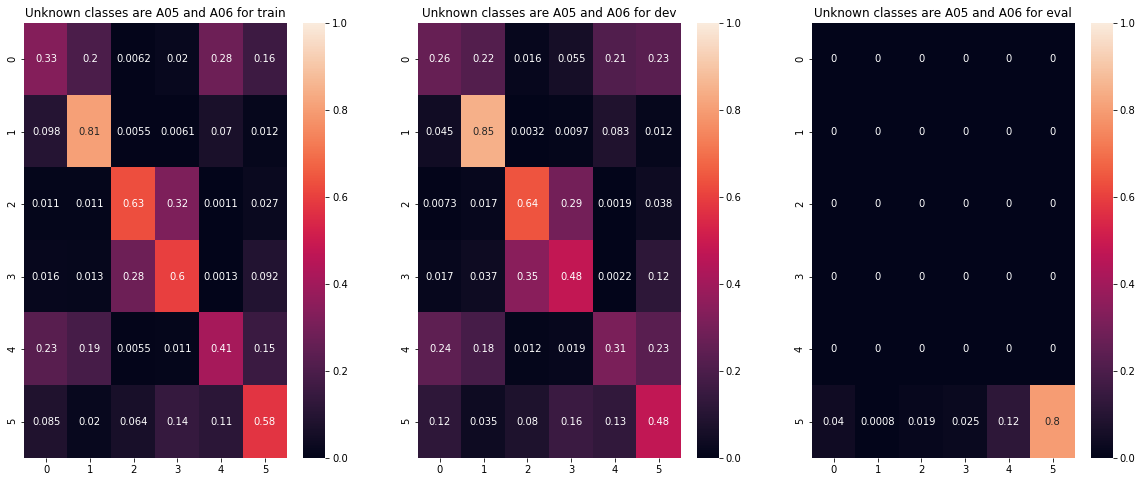

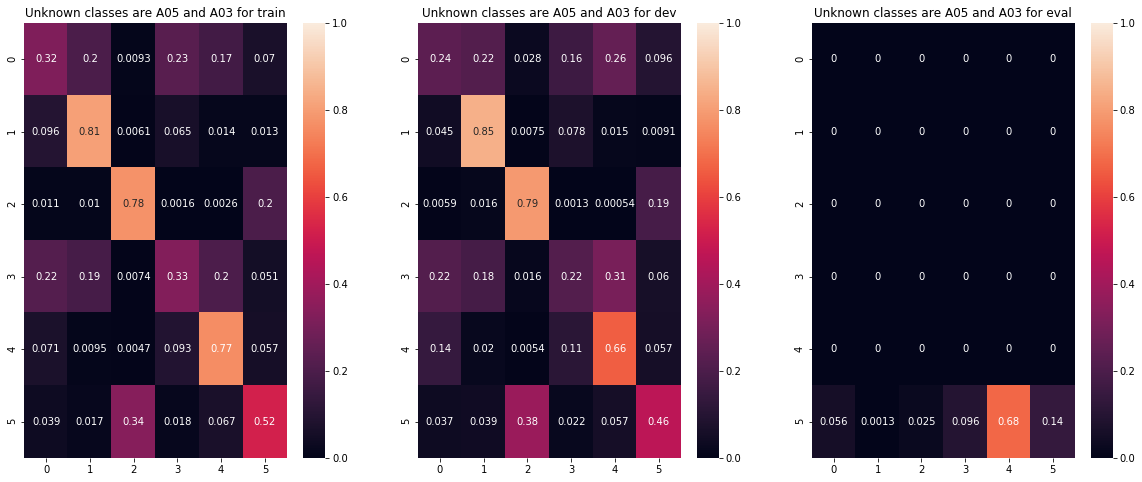

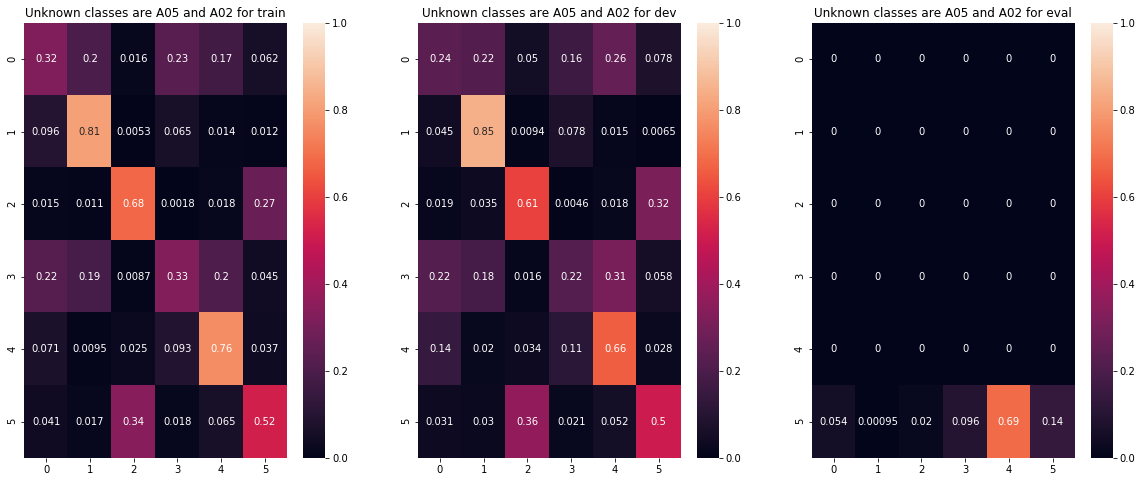

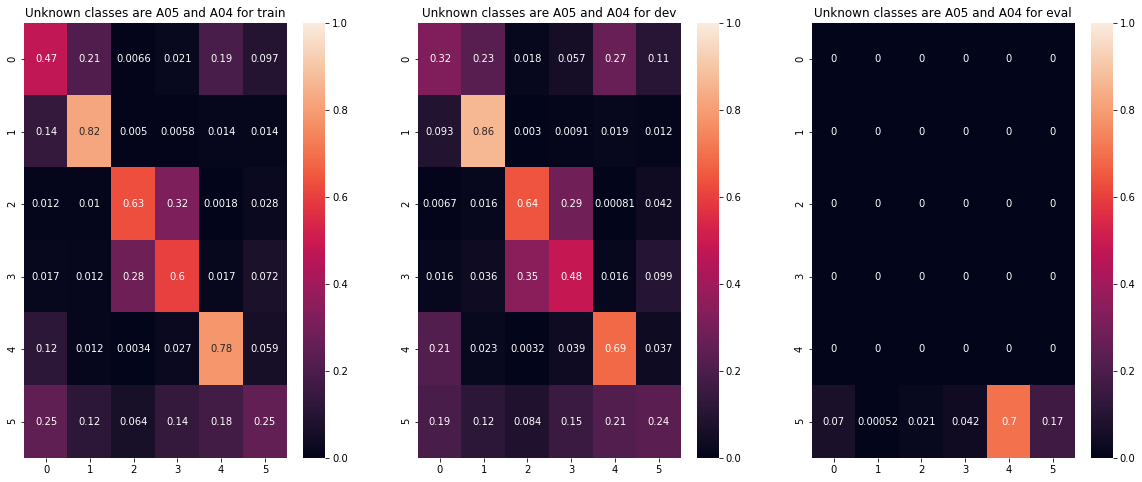

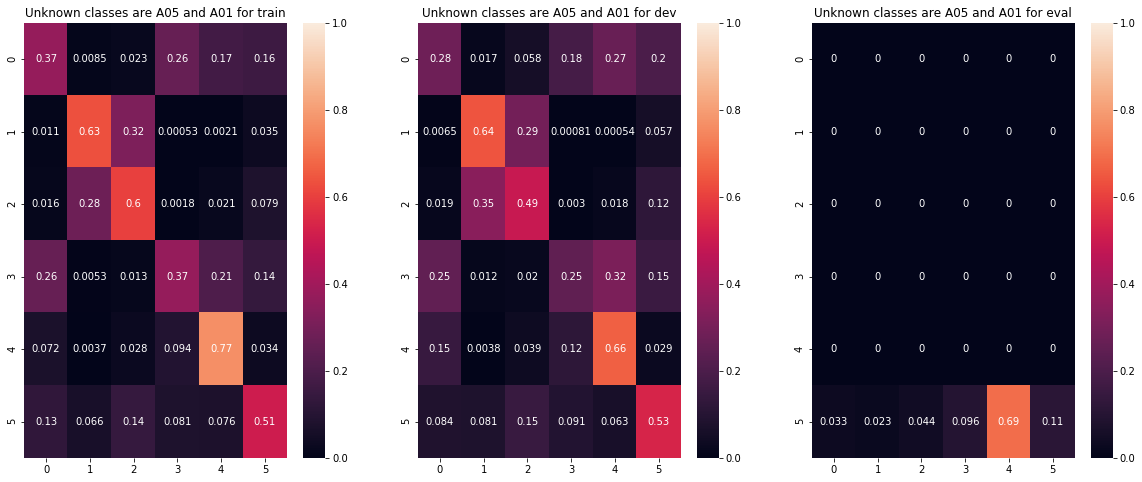

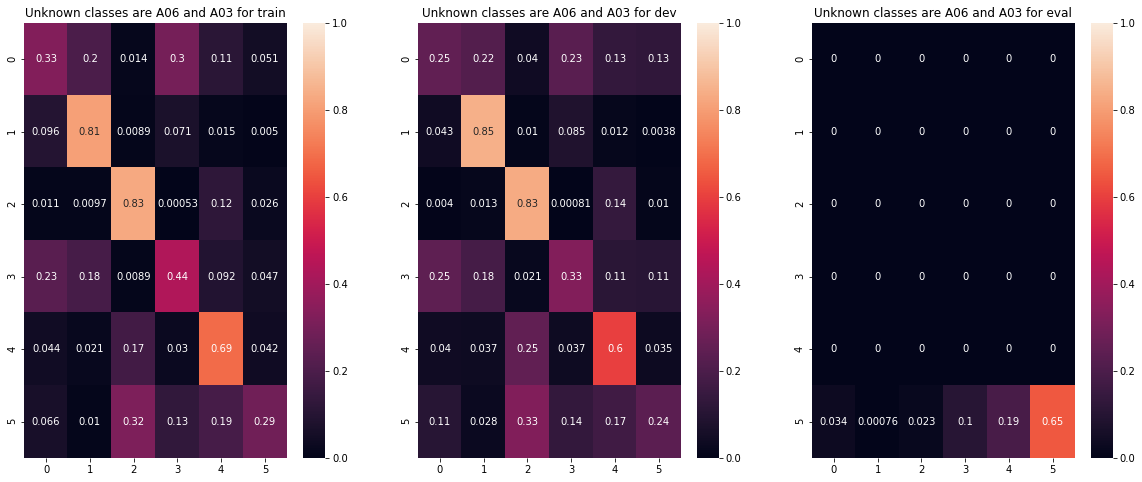

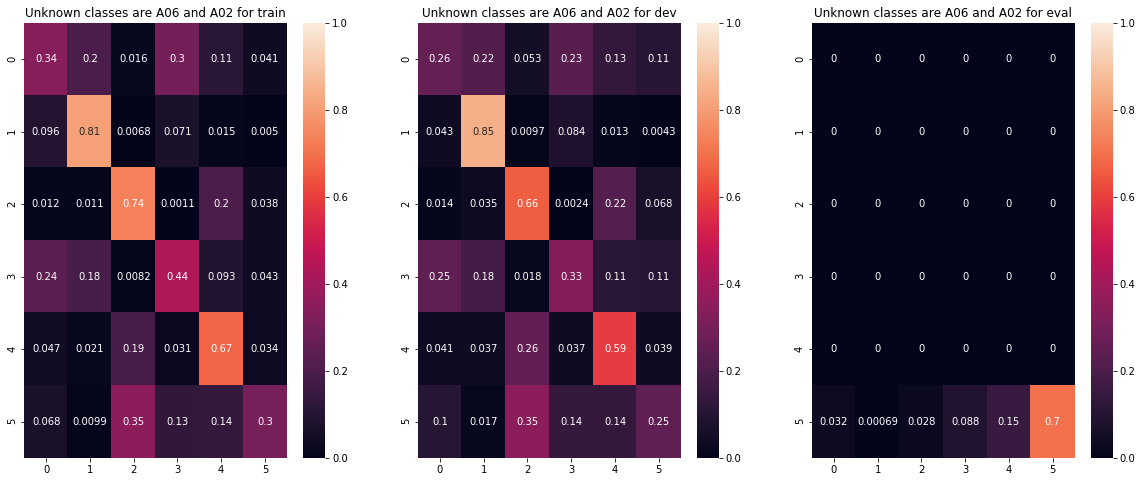

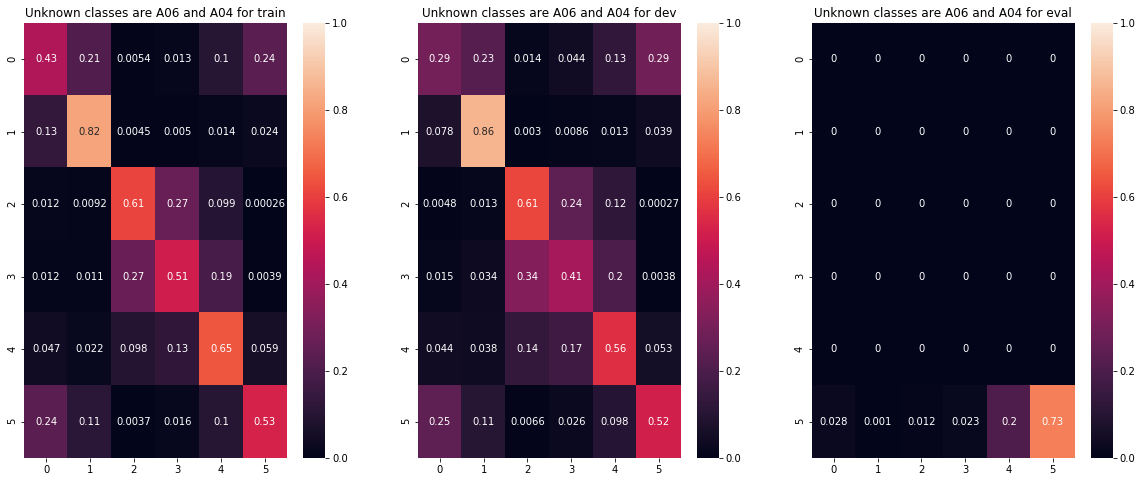

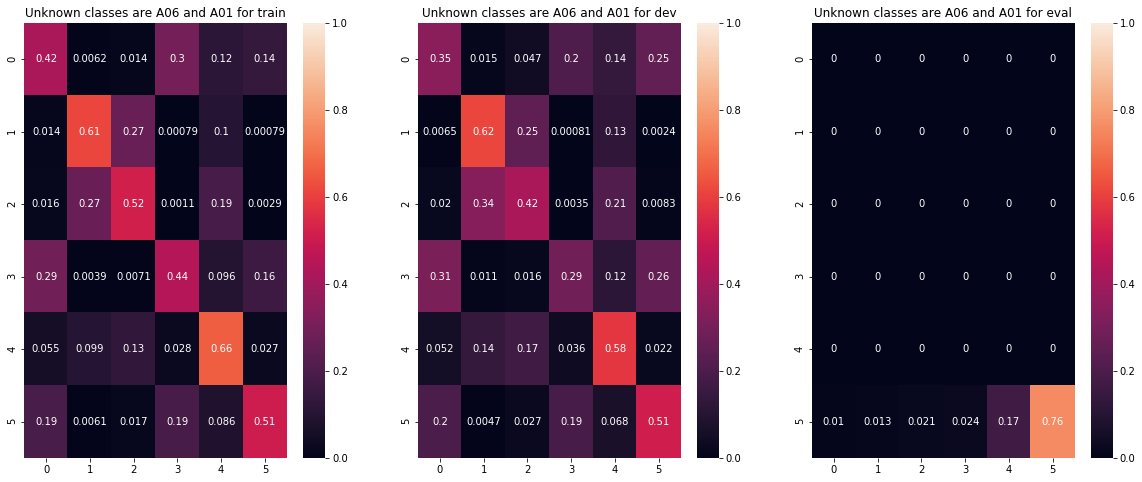

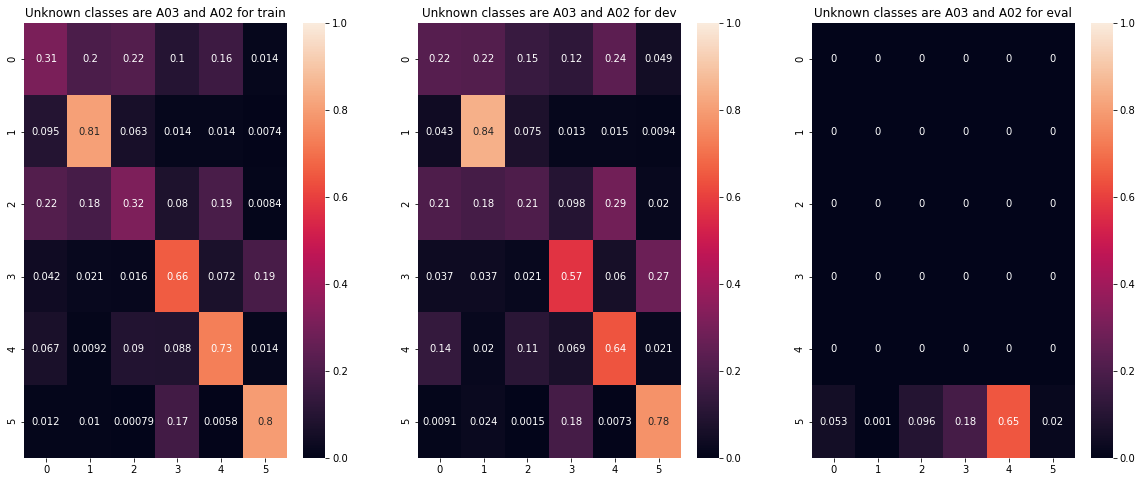

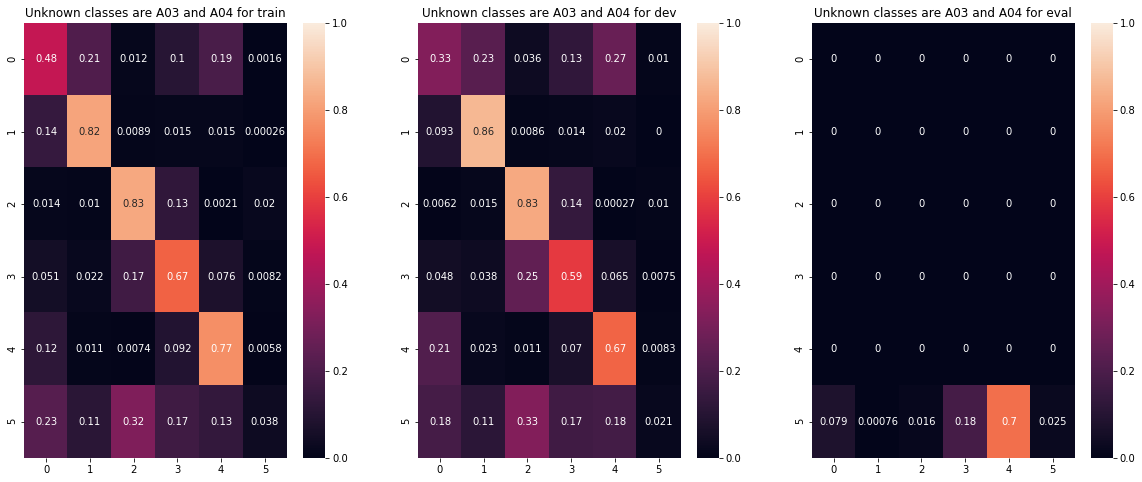

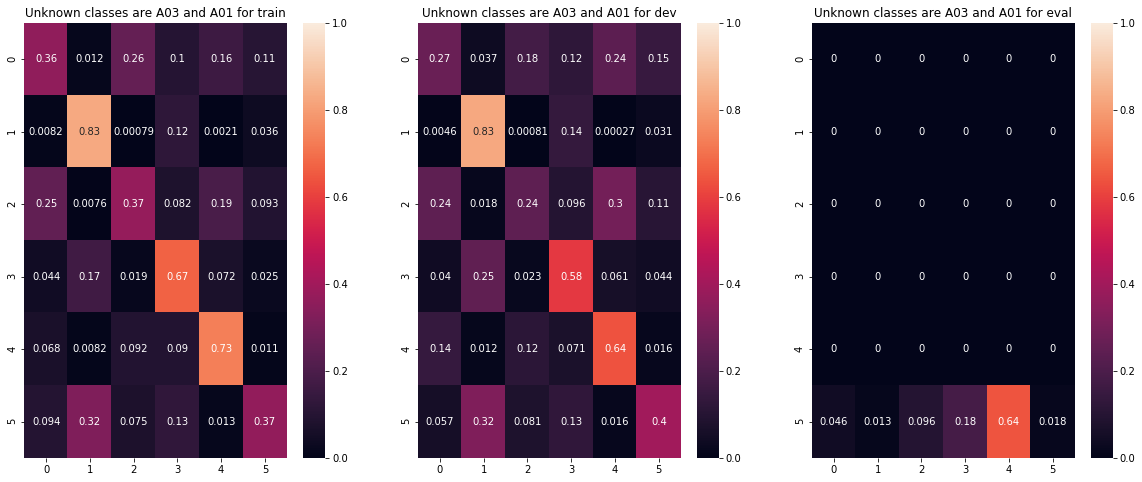

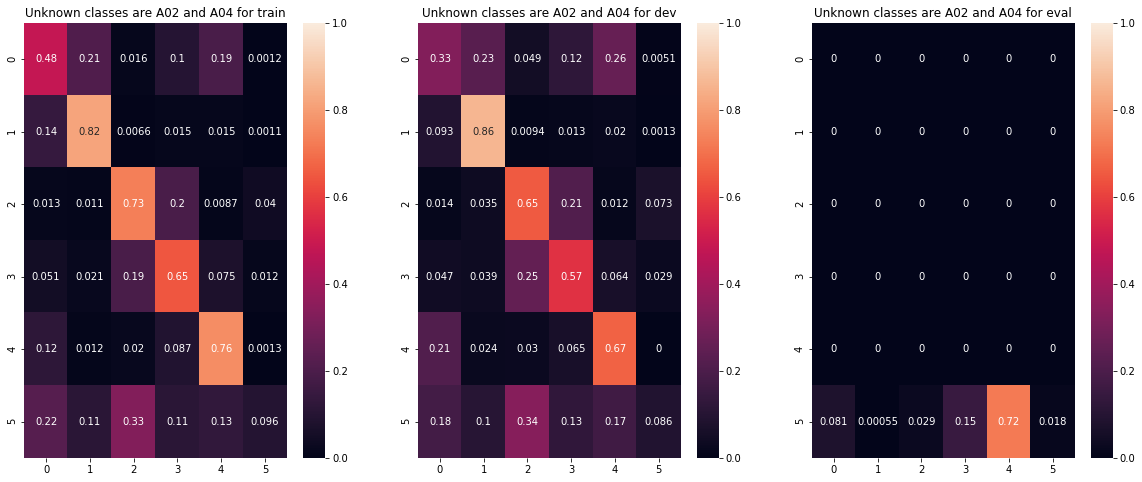

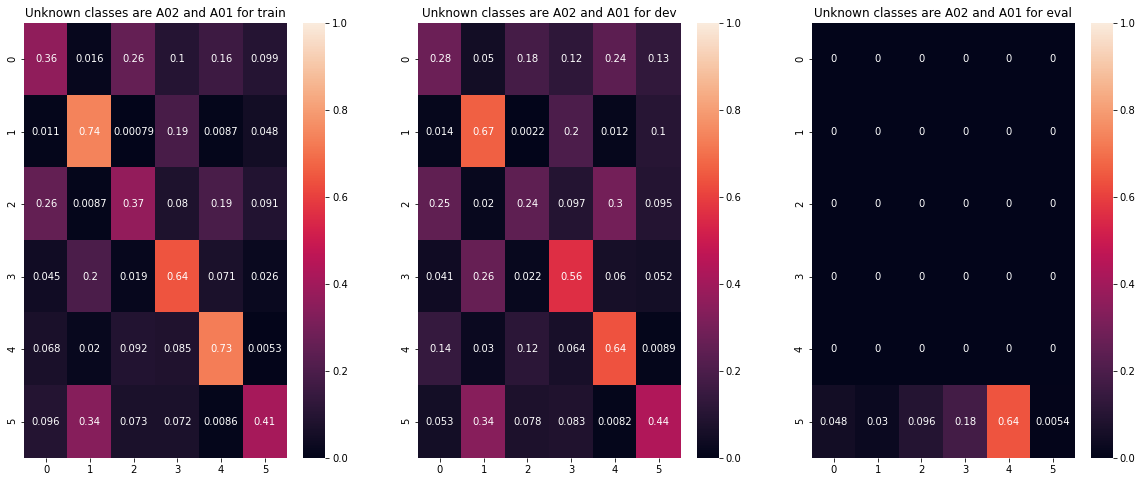

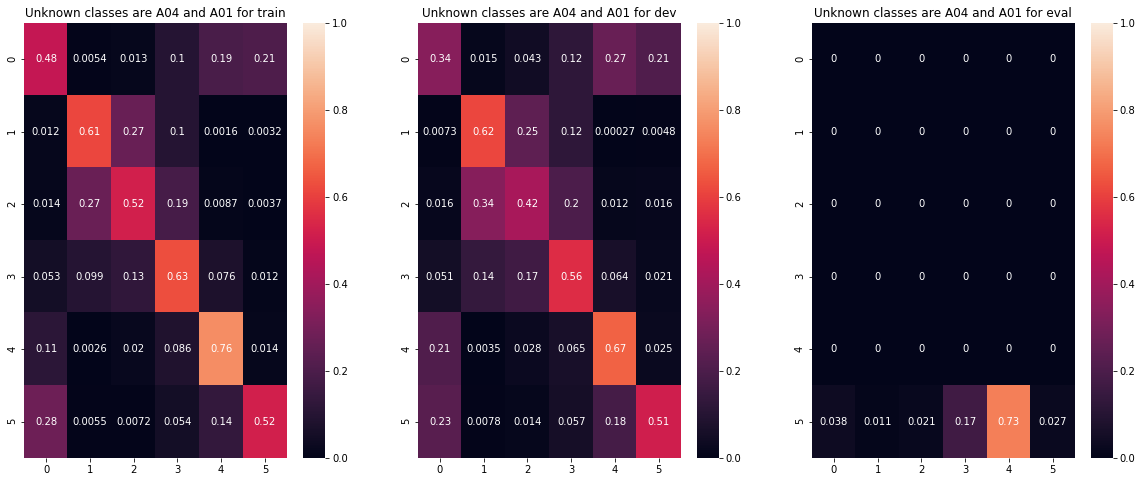

In [13]:
import itertools
unknown_number = 2
unknown_label = 7
multiclass_list= {'-', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06'}
unknown_combinations = itertools.combinations(multiclass_list, unknown_number)


for u in unknown_combinations:
    multiclass_dict = {'-':0, 'A01':1, 'A02':2, 'A03':3, 'A04':4, 'A05':5, 'A06':6}
    
    if u[0] == '-' or u[1] == '-':
        continue
        
    # label 8 corresponds to unknown known
    for i in range(len(u)):
        multiclass_dict[u[i]] = unknown_label 

    
    y_train_open_set = df_train.iloc[:, 2].values
    y_train_open_set = [multiclass_dict[a] for a in y_train_open_set]
    
    y_dev_open_set = df_dev.iloc[:, 2].values
    y_dev_open_set = [multiclass_dict[a] for a in y_dev_open_set]
    
    y_eval_open_set = unknown_label * np.ones(X_eval.shape[0])
    
    X = X_train
    y = y_train_open_set
    #X = np.concatenate([X_train, X_dev])
    #y = np.concatenate([y_train_open_set, y_dev_open_set])

    
    
    open_set_clf = svm.SVC(class_weight='balanced', random_state=2)
    open_set_clf.fit(X, y)
    
    #y_predict = open_set_clf.predict(X_eval)
    y_predict_dev = open_set_clf.predict(X_dev)
    y_predict_eval = open_set_clf.predict(X_eval)
    y_predict_train = open_set_clf.predict(X_train)
    
    #cm = confusion_matrix(y_eval_open_set, y_predict, normalize='true')
    cm_train = confusion_matrix(y_train_open_set, y_predict_train, normalize='true')
    cm_dev = confusion_matrix(y_dev_open_set, y_predict_dev, normalize='true')
    cm_eval = confusion_matrix(y_eval_open_set, y_predict_eval, normalize='true')
    
    plt.figure(figsize = (20,8))
    
    plt.subplot(131)
    plt.title("Unknown classes are {} and {} for train".format(u[0], u[1]))
    sns.heatmap(cm_train, annot=True, vmin=0, vmax=1)

    plt.subplot(132)
    plt.title("Unknown classes are {} and {} for dev".format(u[0], u[1]))
    sns.heatmap(cm_dev, annot=True, vmin=0, vmax=1)
    
    plt.subplot(133)
    plt.title("Unknown classes are {} and {} for eval".format(u[0], u[1]))
    sns.heatmap(cm_eval, annot=True, vmin=0, vmax=1)
    
    plt.show()


In [ ]:
X_train.shape

### Binary SVM

In [ ]:
y_train = df_train.iloc[:, 3].values
y_train = [1 if i=='spoof' else 0 for i in y_train]

y_dev = df_dev.iloc[:, 3].values
y_dev = [1 if i=='spoof' else 0 for i in y_dev]

y_eval = df_eval.iloc[:, 3].values
y_eval = [1 if i=='spoof' else 0 for i in y_dev]


In [ ]:
clf = svm.SVC(class_weight='balanced')
clf.fit(X_train, y_train)

 NFFT = 256, HOP_SIZE = 128
 
 0.89

In [ ]:
clf.score(X_dev, y_dev)

In [ ]:
y_predict = clf.predict(X_dev)
cm = confusion_matrix(y_dev, y_predict, normalize='true' )

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

### Multiclass SVM

In [ ]:
multiclass_dict = {'-':0, 'A01':1, 'A02':2, 'A03':3, 'A04':4, 'A05':5, 'A06':6}
y_train_multiclass = df_train.iloc[:, 2].values
y_train_multiclass = [multiclass_dict[a] for a in y_train_multiclass]

y_dev_multiclass = df_dev.iloc[:, 2].values
y_dev_multiclass = [multiclass_dict[a] for a in y_dev_multiclass]

In [ ]:
mclf = svm.SVC()
mclf.fit(X_train, y_train_multiclass)

In [ ]:
y_predict_multiclass = mclf.predict(X_dev)
cm = confusion_matrix(y_dev_multiclass, y_predict_multiclass)


plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)